In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('fake_job_postings.csv')

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
import missingno

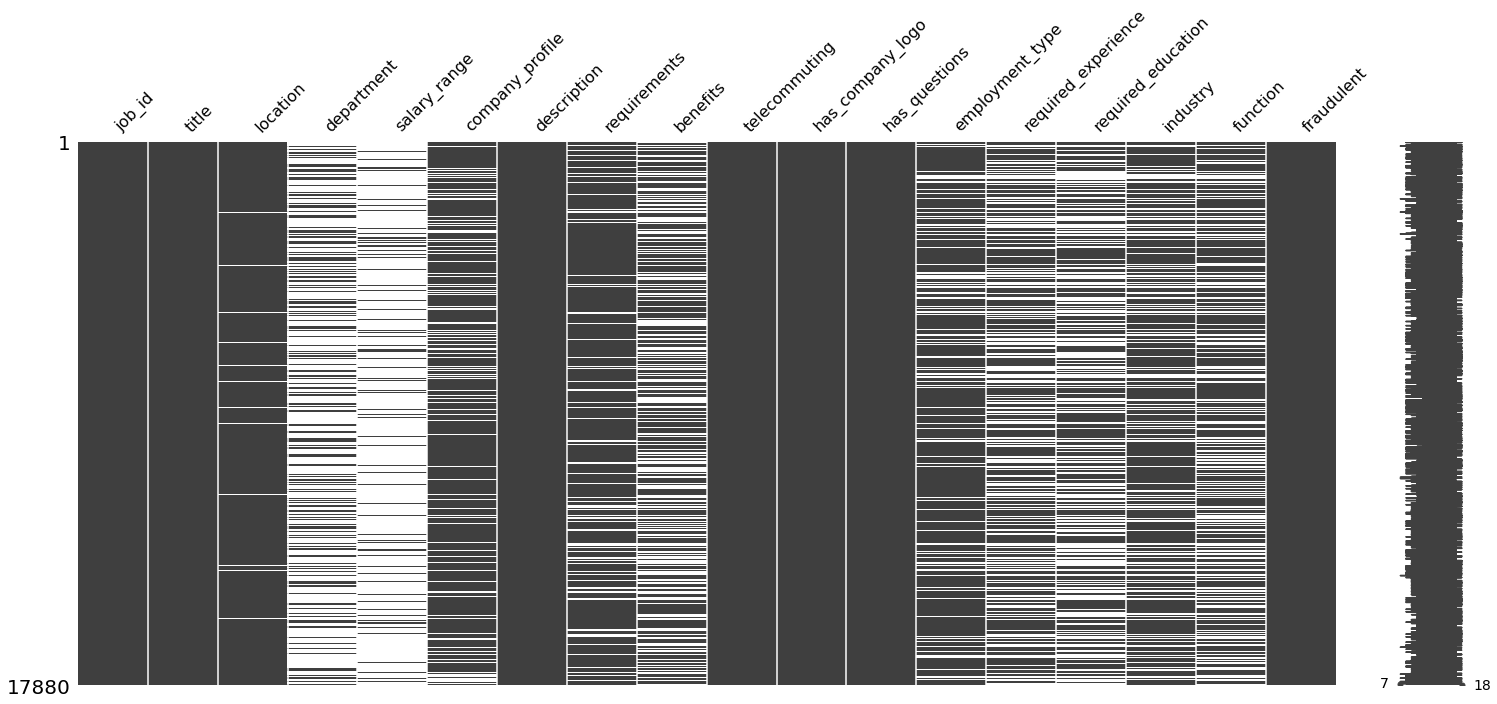

In [5]:
missingno.matrix(data)

In [6]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

From describing our data we get to know that their are 4 columns named as job_id, telecommuting, has_company_logo and has_questions features which have numerical data. So we can easily remove these columns as they are of no use in text classification problems.

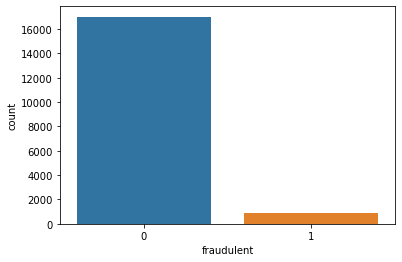

In [8]:
sns.countplot(data['fraudulent'])

From the plot we can see their are very few fraud jobs posted.
Our data is very much imbalanced so its a hard work to make a good classifier, we have tried best :-)

In [9]:
data.fillna(' ',inplace=True)

In [10]:
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for c in columns:
    del data[c]

In [11]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


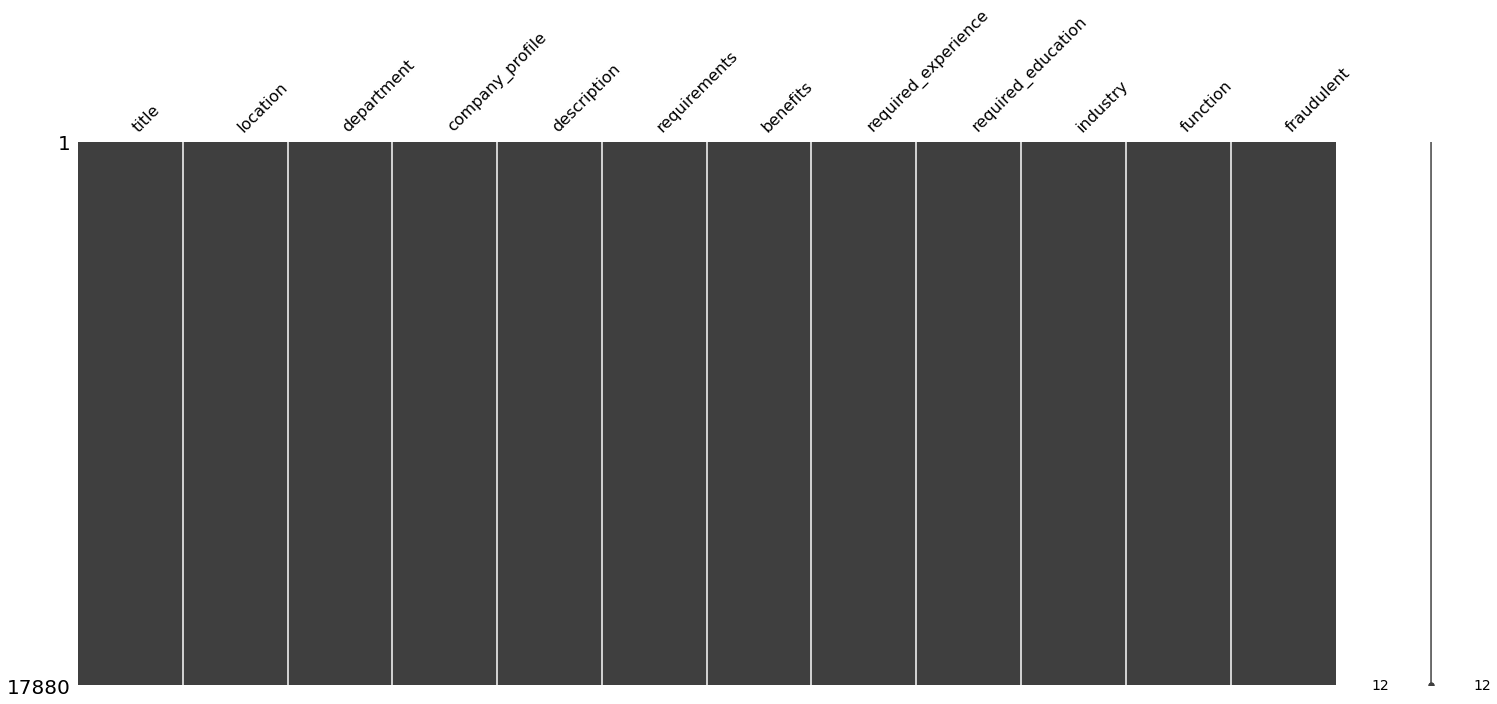

In [12]:
missingno.matrix(data)

In [13]:
def split(location):
    con=location.split(',')
    return con[0]
data['country']=data['location'].apply(split)

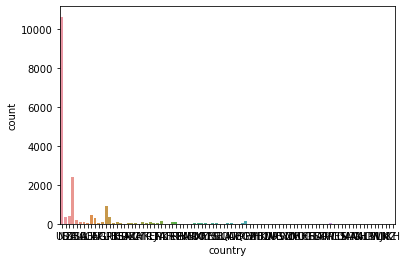

In [14]:
sns.countplot(data['country'])

Text(0.5, 0, 'Countries')

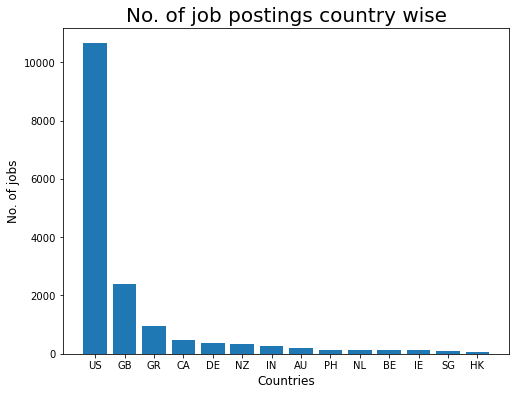

In [15]:
country = dict(data.country.value_counts()[:15])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('No. of job postings country wise', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=12)
plt.xlabel('Countries', size=12)

In [16]:
data['country'].nunique()

91

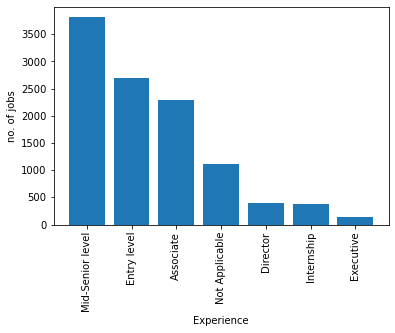

In [17]:
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.bar(experience.keys(), experience.values())
plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

In [18]:
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [19]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [20]:
fraudtext=data[data.fraudulent==1].text
actualtext=data[data.fraudulent==0].text

In [21]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [22]:
from wordcloud import WordCloud

In [23]:
STOPWORDS=STOP_WORDS

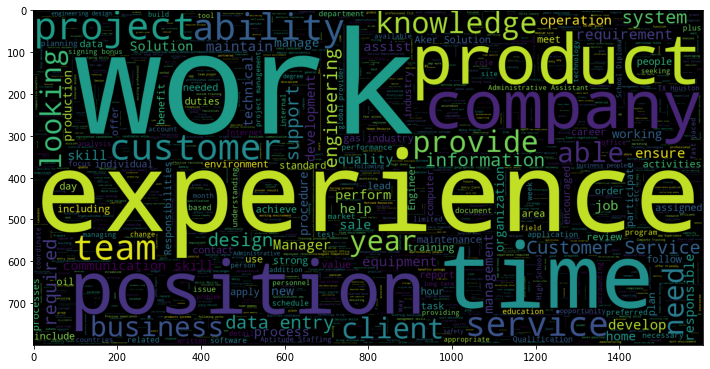

In [24]:
plt.figure(figsize=(12,12))
wc=WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,stopwords=STOPWORDS).generate(str(' '.join(fraudtext)))
plt.imshow(wc)

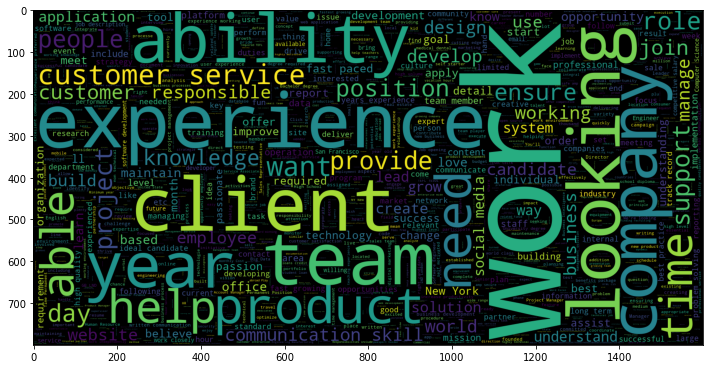

In [25]:
plt.figure(figsize=(12,12))
wc=WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,stopwords=STOPWORDS).generate(str(' '.join(actualtext)))
plt.imshow(wc)

In [26]:
import string
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix,classification_report,f1_score

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [29]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [30]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,3))


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [32]:
# splitting our data in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3,random_state=101)

## Logistic Regression

In [33]:
clf=LogisticRegression()
pipe=Pipeline([('cleaning',predictors()),
             ('vectorizer',bow_vector),
             ('classifier',clf)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaning',
                 <__main__.predictors object at 0x00000214CAC4B070>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x000002149C3F8DC0>)),
                ('classifier', LogisticRegression())])

In [34]:
predicted=pipe.predict(X_test)
print("Classification Report")
print(classification_report(y_test,predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5111
           1       0.99      0.69      0.81       253

    accuracy                           0.99      5364
   macro avg       0.99      0.84      0.90      5364
weighted avg       0.99      0.99      0.98      5364



In [35]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted))
print("Logistic Regression Recall:", recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9850857568978374
Logistic Regression Recall: 0.6877470355731226


In [36]:
print("Logistic Regression F1-Score",f1_score(y_test,predicted))

Logistic Regression F1-Score 0.8130841121495328


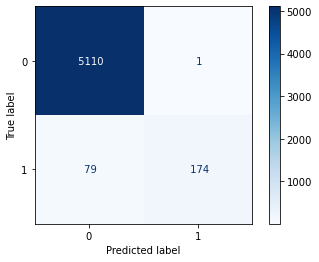

In [37]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [38]:
print('ROC-AUC Score of Logistic Regression:')
print(roc_auc_score(y_test,predicted))

ROC-AUC Score of Logistic Regression:
0.8437756895729045


## Random Forest

In [39]:
clf = RandomForestClassifier()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000214A677B1F0>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x000002149C3F8DC0>)),
                ('classifier', RandomForestClassifier())])

In [40]:
predicted1=pipe.predict(X_test)
print("Classification Report")
print(classification_report(y_test,predicted1))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5111
           1       0.99      0.64      0.78       253

    accuracy                           0.98      5364
   macro avg       0.99      0.82      0.88      5364
weighted avg       0.98      0.98      0.98      5364



In [41]:
print("Random Forest Accuracy:", accuracy_score(y_test, predicted1))
print("Random Forest Recall:", recall_score(y_test, predicted1))

Random Forest Accuracy: 0.982662192393736
Random Forest Recall: 0.6363636363636364


In [42]:
print("Random Forest F1-Score",f1_score(y_test,predicted1))

Random Forest F1-Score 0.7759036144578313


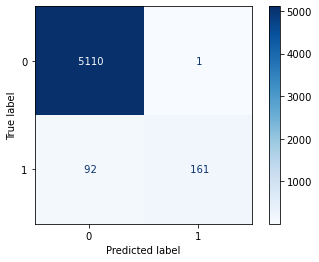

In [43]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [44]:
print('ROC-AUC Score of Random Forest:')
print(roc_auc_score(y_test,predicted1))

ROC-AUC Score of Random Forest:
0.8180839899681612


## Support Vector Machines

In [45]:
clf = SVC()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000214C6BF2700>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x000002149C3F8DC0>)),
                ('classifier', SVC())])

In [46]:
predicted2=pipe.predict(X_test)
print("Classification Report")
print(classification_report(y_test,predicted2))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5111
           1       1.00      0.49      0.65       253

    accuracy                           0.98      5364
   macro avg       0.99      0.74      0.82      5364
weighted avg       0.98      0.98      0.97      5364



In [47]:
print("Support Vector Accuracy:", accuracy_score(y_test, predicted2))
print("Support Vector Recall:", recall_score(y_test, predicted2))

Support Vector Accuracy: 0.9757643549589858
Support Vector Recall: 0.48616600790513836


In [48]:
print("Support Vector F1-Score",f1_score(y_test,predicted2))

Support Vector F1-Score 0.6542553191489362


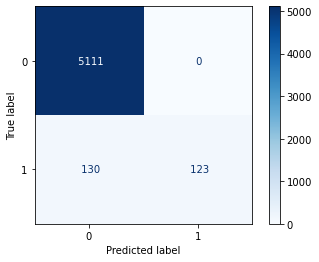

In [49]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [50]:
print('ROC-AUC Score of Support Vector Machine:')
print(roc_auc_score(y_test,predicted2))

ROC-AUC Score of Support Vector Machine:
0.7430830039525692


## XG Boost

In [51]:
clf = XGBClassifier()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000214CB391F70>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x000002149C3F8DC0>)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
  

In [52]:
predicted3=pipe.predict(X_test)
print("Classification Report")
print(classification_report(y_test,predicted3))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5111
           1       0.97      0.66      0.78       253

    accuracy                           0.98      5364
   macro avg       0.98      0.83      0.89      5364
weighted avg       0.98      0.98      0.98      5364



In [53]:
print("XG Boost Accuracy:", accuracy_score(y_test, predicted3))
print("XG Boost Recall:", recall_score(y_test, predicted3))

XG Boost Accuracy: 0.9828486204325131
XG Boost Recall: 0.6561264822134387


In [54]:
print("XG Boost F1-Score",f1_score(y_test,predicted3))

XG Boost F1-Score 0.7830188679245284


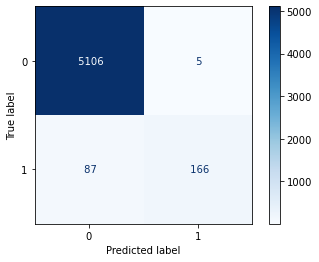

In [55]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

In [56]:
print('ROC-AUC Score of XG Boost:')
print(roc_auc_score(y_test,predicted3))

ROC-AUC Score of XG Boost:
0.8275741000384353
